In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import prepare as p
import explore as e
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split


## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df = w.clean_zillow()
df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county
3,0,0.0,1535,2108,1953,174.21,Los Angeles
4,4,2.0,3633,296425,2005,6941.39,Los Angeles
6,3,4.0,1620,847770,2011,10244.94,Los Angeles
7,3,2.0,2077,646760,1926,7924.68,Los Angeles
8,0,0.0,1535,6730242,1953,80348.13,Los Angeles


In [3]:
train, val, test = p.split_data(df)

train.shape, val.shape, test.shape

((1503871, 7), (322258, 7), (322259, 7))

---

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

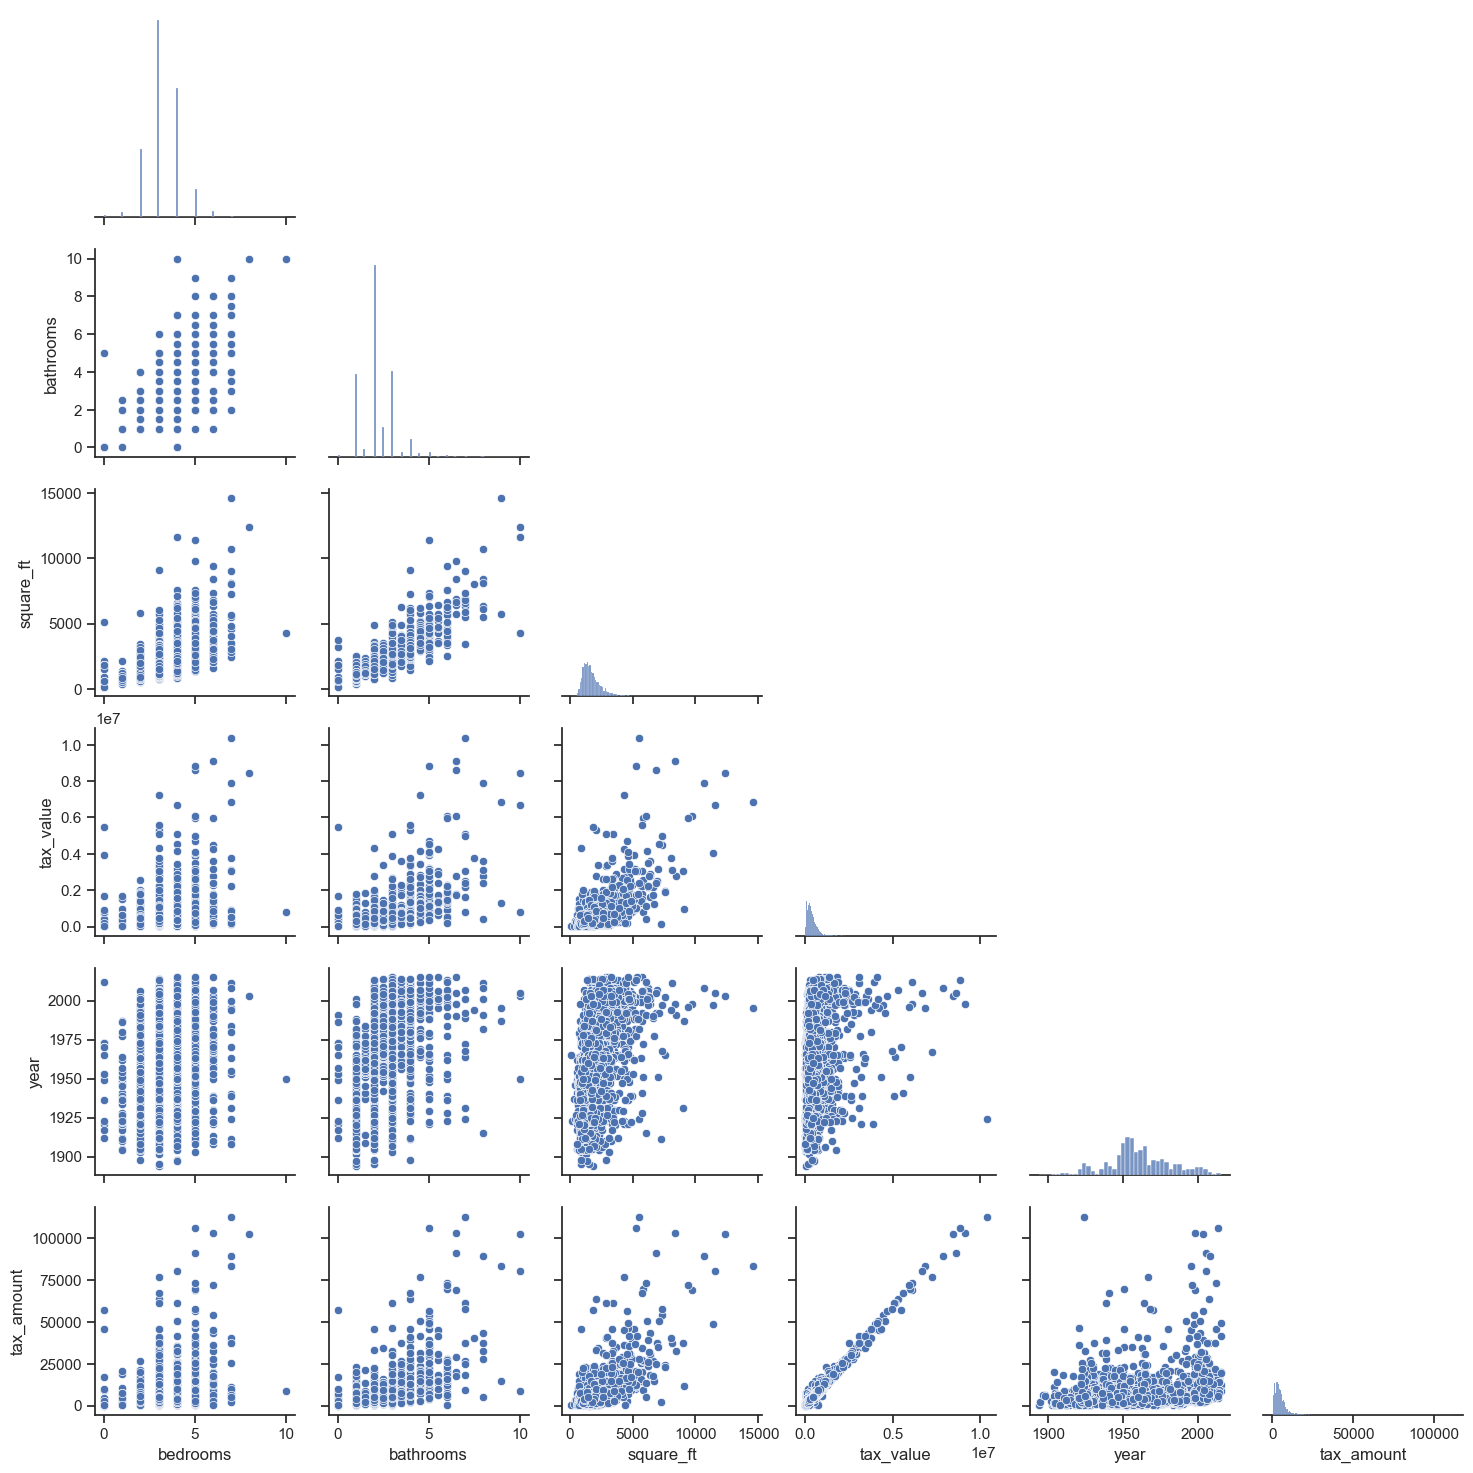

In [4]:
e.plot_variable_pairs(train)

---

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

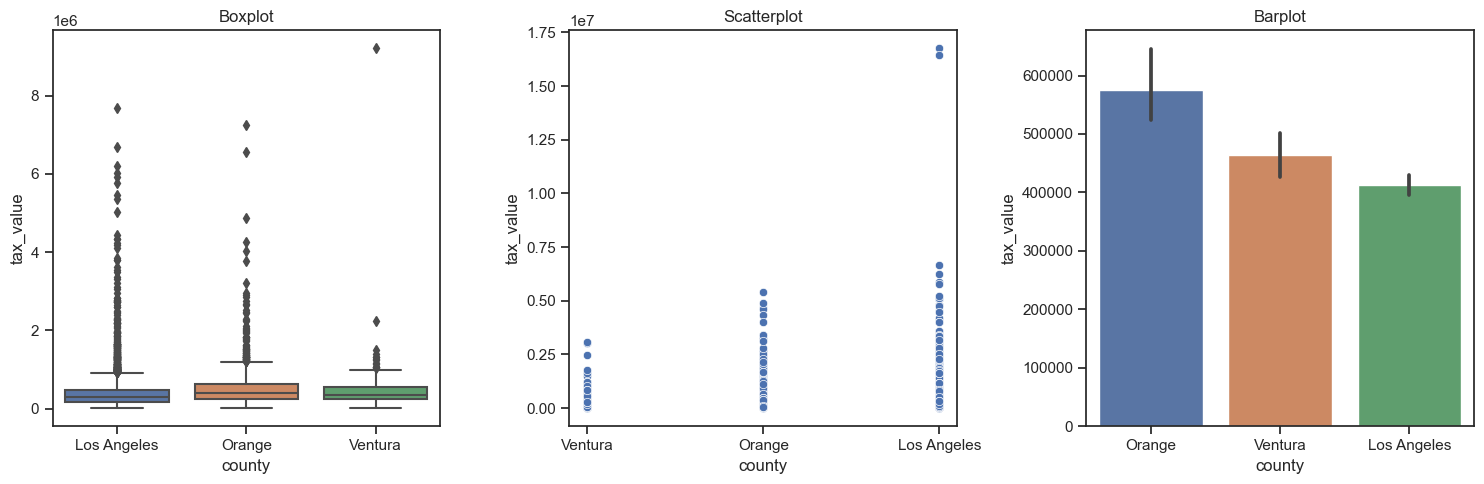

In [5]:
e.plot_categorical_and_continuous_vars(train, 'county', 'tax_value')

---

## Come up with some initial hypotheses based on your goal of predicting property value.

## Visualize all combinations of variables in some way.

## Run the appropriate statistical tests where needed.

Ho = There is not a correlation between square_ft and tax_value

Ha = There is a correlation between square_ft and tax_value

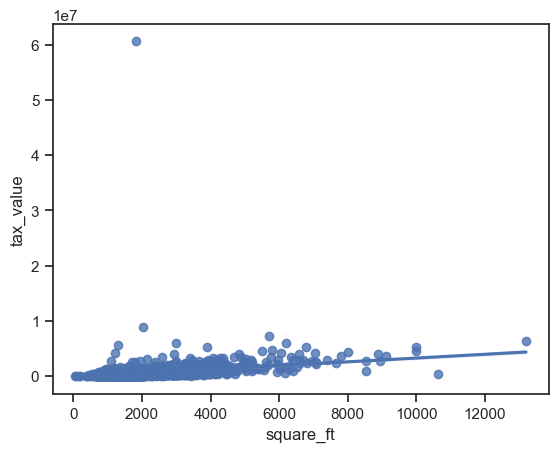

In [6]:
sns.regplot(x='square_ft', y='tax_value', data=train.sample(5_000))

plt.show()

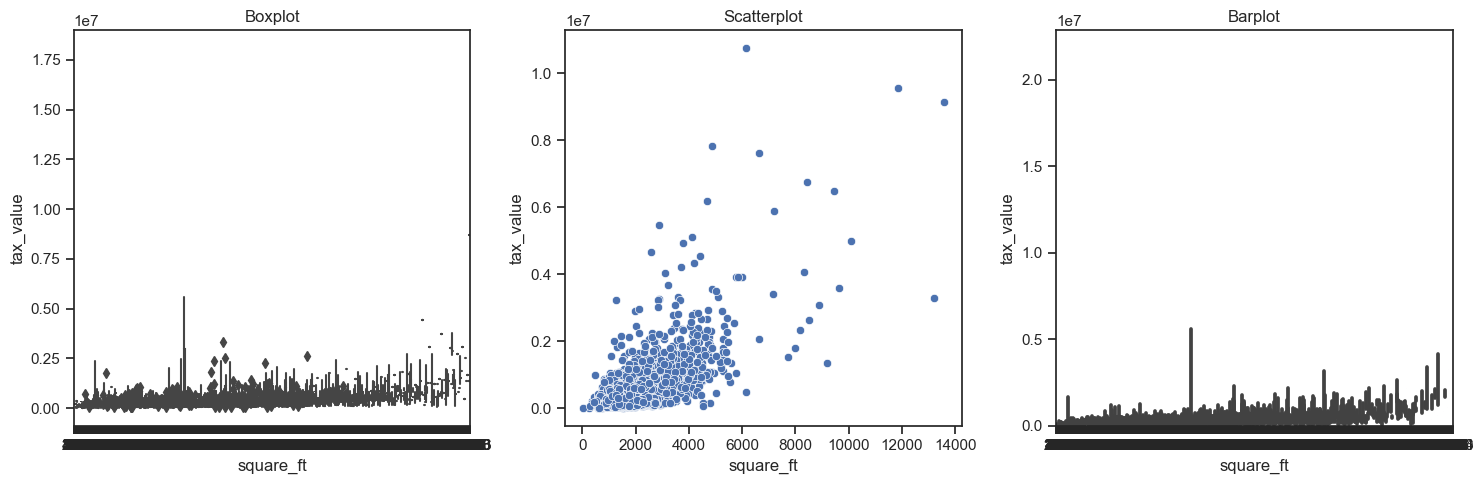

In [7]:
e.plot_categorical_and_continuous_vars(train, 'square_ft', 'tax_value')

In [8]:
e.spear_test(train, 'square_ft', 'tax_value')

r = 0.5216858836692466
p = 0.0

Conclusion: Reject the null, There is a correlation


---

Ho = There is not a correlation between tax_amount and tax_value

Ha = There is a correlation between tax_amount and tax_value

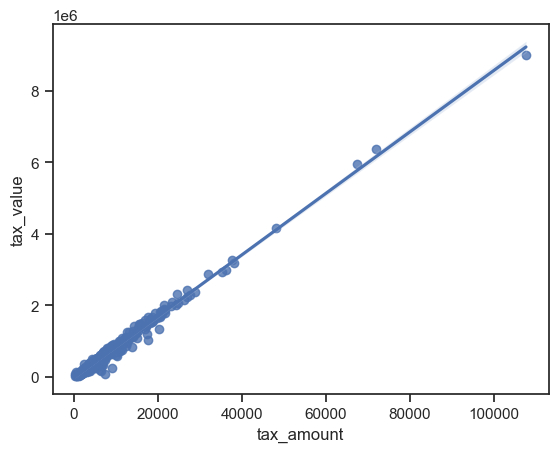

In [9]:
sns.regplot(x='tax_amount', y='tax_value', data=train.sample(1_000))

plt.show()

In [10]:
e.spear_test(train, 'tax_amount', 'tax_value')

r = 0.9784709020395388
p = 0.0

Conclusion: Reject the null, There is a correlation


---

## Does bedrooms affect tax value?

Ho = There is not a correlation between bedrooms and tax_value

Ha = There is a correlation between bedrooms and tax_value

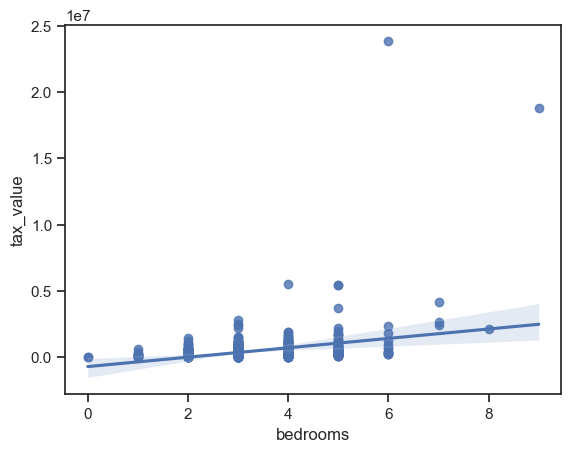

In [41]:
sns.regplot(x='bedrooms', y='tax_value', data=train.sample(1_000))

plt.show()

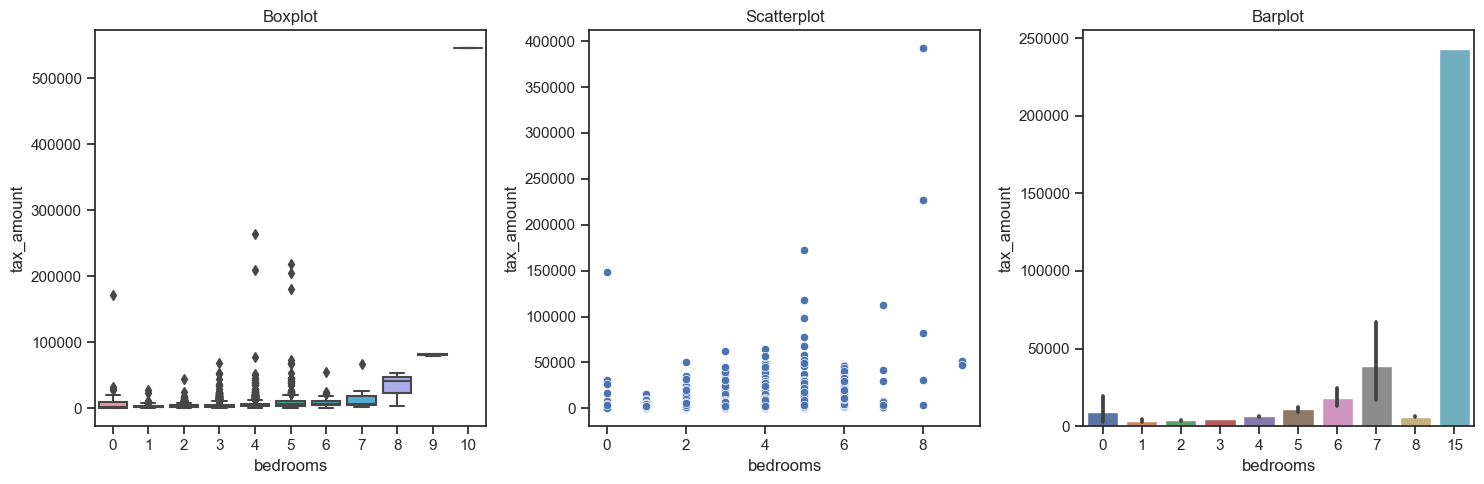

In [12]:
e.plot_categorical_and_continuous_vars(train, 'bedrooms', 'tax_value')

In [13]:
e.spear_test(train, 'bedrooms', 'tax_value')

r = 0.29538511494360103
p = 0.0

Conclusion: Reject the null, There is a correlation


---

Ho = There is not a relationship between year and tax_value

Ha = There is a relationship between year and tax_value

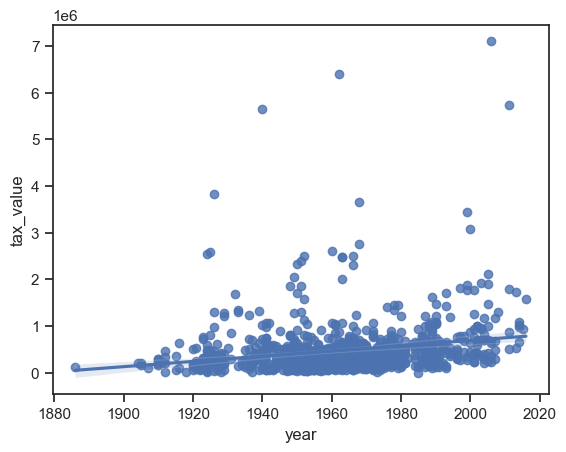

In [17]:
sns.regplot(x='year', y='tax_value', data=train.sample(1_000))

plt.show()

In [18]:
e.spear_test(train, 'year', 'tax_value')

r = 0.28947437901219225
p = 0.0

Conclusion: Reject the null, There is a correlation


---

Ho = There is not a relationship between county and tax_value

Ha = There is a relationship between county and tax_value

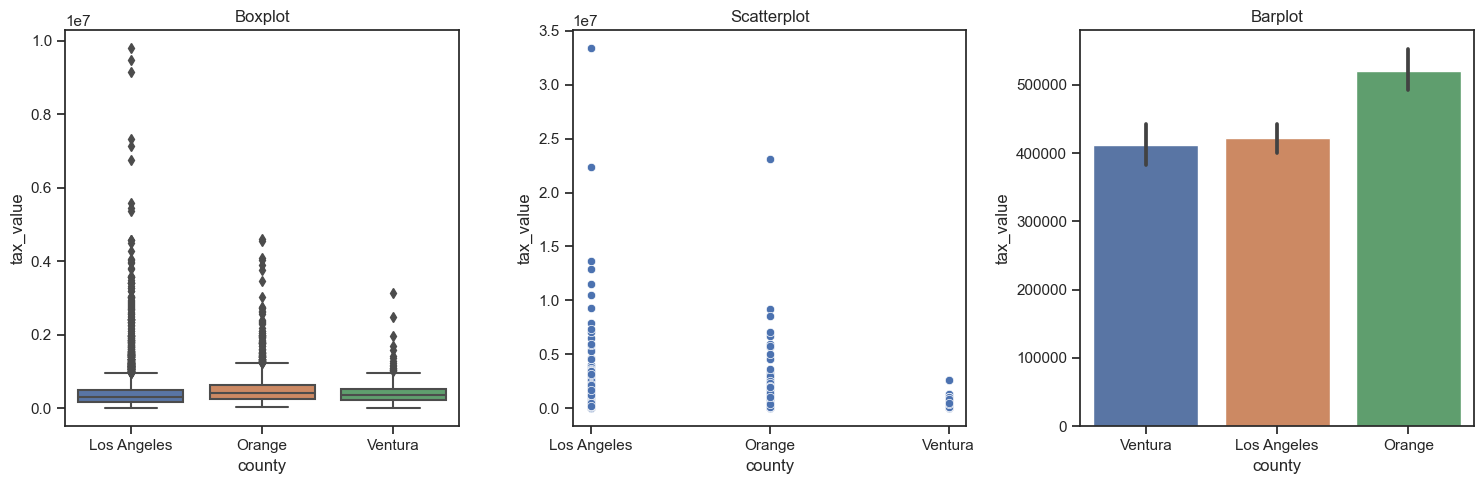

In [14]:
e.plot_categorical_and_continuous_vars(train, 'county', 'tax_value')

In [15]:
def chi(df, target, feature):
    
    cross_tab = pd.crosstab(df[target], df[feature])

    chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

    print("Chi-Square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)
    print('')

    if p_val < 0.05:
    
        print("Conclusion: There is a significant association between the variables. We reject the null hypothesis")

    else:
    
        print("Conclusion: There is no significant association between the variables. we fail to reject the null hypothesis")

In [16]:
chi(train, 'tax_value', 'county')

Chi-Square Statistic: 1861591.7977062631
P-value: 0.0
Degrees of Freedom: 978272
Expected Frequencies:
 [[4.65084705 1.80820762 0.54094533]
 [3.32203361 1.29157687 0.38638952]
 [0.66440672 0.25831537 0.0772779 ]
 ...
 [0.66440672 0.25831537 0.0772779 ]
 [0.66440672 0.25831537 0.0772779 ]
 [0.66440672 0.25831537 0.0772779 ]]

Conclusion: There is a significant association between the variables. We reject the null hypothesis


---

## What independent variables are correlated with the dependent variable, home value?

- County
- Bedrooms
- Square ft
- Year

---

## Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [25]:
train['age'] = 2017 - train.year
train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county,age
1911171,2,1.0,1180,288951,1946,3521.04,Los Angeles,71
818602,4,3.0,2594,266330,1973,2845.16,Ventura,44
1795717,4,2.5,2454,325747,2009,3724.72,Orange,8
1973528,4,1.0,1700,40740,1911,1047.53,Los Angeles,106
1139959,4,2.5,2598,369055,1964,4452.26,Orange,53


In [30]:
# Automatically calculate equal-width bins
pd.cut(train['age'], bins=5)

1911171     (44.0, 87.0]
818602     (0.785, 44.0]
1795717    (0.785, 44.0]
1973528    (87.0, 130.0]
1139959     (44.0, 87.0]
               ...      
2007451     (44.0, 87.0]
1573272    (87.0, 130.0]
733694      (44.0, 87.0]
110535      (44.0, 87.0]
1696257     (44.0, 87.0]
Name: age, Length: 1503871, dtype: category
Categories (5, interval[float64, right]): [(0.785, 44.0] < (44.0, 87.0] < (87.0, 130.0] < (130.0, 173.0] < (173.0, 216.0]]

In [37]:
# Create bins and assign labels
train['age_bins'] = pd.cut(train['age'], bins=5, labels=['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5'])

In [38]:
train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county,age,X_bins,age_bins
1911171,2,1.0,1180,288951,1946,3521.04,Los Angeles,71,Bin 2,Bin 2
818602,4,3.0,2594,266330,1973,2845.16,Ventura,44,Bin 1,Bin 1
1795717,4,2.5,2454,325747,2009,3724.72,Orange,8,Bin 1,Bin 1
1973528,4,1.0,1700,40740,1911,1047.53,Los Angeles,106,Bin 3,Bin 3
1139959,4,2.5,2598,369055,1964,4452.26,Orange,53,Bin 2,Bin 2


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

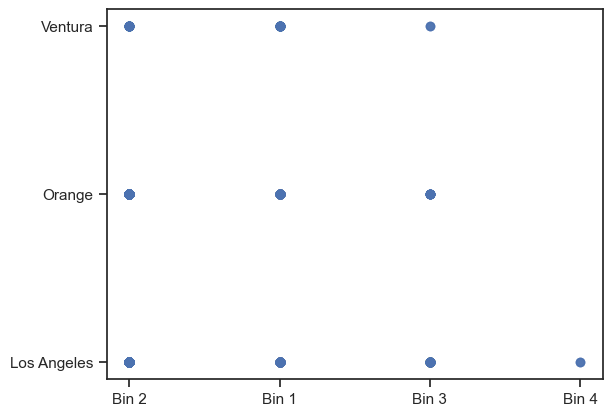

In [40]:
sns.regplot(x='age_bins', y='', data=train.sample(1_000))

plt.show()